# **Primera entrega del proyecto final**






---



# **ABSTRACT con objetivo y contexto comercial**

Este proyecto analiza datos de una aplicación de Food delivery para mejorar la eficiencia en la entrega de alimentos y la experiencia del cliente. Los datos incluyen información sobre las ordenes y los repartidoress. El **objetivo** es identificar patrones y tendencias en el desempeño de los repartidores para mejorar la calidad del servicio y aumentar la satisfacción del cliente.

El sector de entrega de alimentos ha experimentado un gran crecimiento y las aplicaciones de delivery se han vuelto populares. A medida que la competencia aumenta, las empresas deben identificar formas de mejorar la eficiencia y la calidad del servicio. La clientela se ha empezado a costumbrar a este tipo de servicio y para poder sobresalir ya no alcanza con ofrecerlo, sino con que calidad se hace. Poder entregar los alimentos en buen estado y más rapido que la competencia se vuelve crucial.

**El objetivo de este proyecto** es desarrollar un modelo de análisis predictivo que permita estimar el tiempo de entrega de un pedido en función de diferentes variables, tales como la distancia, el repartidor asignado y otras características relevantes del pedido.

Trabajo en el equipo de operaciones de la empresa por lo que tengo mucha información y acceso a la data reciente sobre como se han desarrollado las metricas.Es responsabilidad de nuestro equipo mejorar los tiempos de entrega.

Se espera que este proyecto tenga implicaciones importantes para la empresa de entrega de alimentos y el sector de delivery en general. Al mejorar la eficiencia y la calidad del servicio, la empresa puede aumentar la satisfacción del cliente y mantenerse competitiva en un mercado en constante evolución.



## **Preguntas/hipotesis**

**Pregunta:** ¿Qué características de las ordenes y repartidores son más relevantes para el tiempo de una orden?

**Hipótesis:**Creo que impactan mas la distancia, condiciones climáticas, y el tráfico.


**Pregunta:** ¿Cómo varía el tiempo total de entrega en base a la distancia recorrida?

**Hipótesis:** A más distancia las entregas duran más tiempo


**Pregunta:** ¿Cómo varía el tiempo total de entrega en base a las condiciones climáticas?

**Hipótesis:**A mejores condiciones climáticas menor tiempo de entrega


**Pregunta:** ¿Cómo varía el tiempo total de entrega en base a el tráfico?

**Hipótesis:** A mayor tráfico mayor tiempo de entrega

**Pregunta:** ¿Cómo varía el tiempo total de entrega en base a el rating y la edad?

**Hipótesis:** A mayor rating menor tiempo y a mas edad mas tiempo.

# Contexto analítico
Hemos obtenido de nuestra base de datos todas las ordenes realizadas en el último tiempo.Los datos están etiquetados y tengo la intención de predecir el tiempo necesario para entregar una orden de acuerdo a las condiciones de esta, por lo que planeo utilizar modelos de regresión para abordar este problema de aprendizaje supervisado.




# **Descarga de datos**

In [ ]:
# importo mi dataset desde github
base= 'https://raw.githubusercontent.com/pazvila/Coderdata/main/food_delivery.csv'

In [ ]:
#lo leo y consulto
import pandas as pd
df=pd.read_csv(base)
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [ ]:
df.shape

(45593, 20)

In [ ]:
df.columns.tolist()

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Time_taken(min)']

In [ ]:
df.info #como primera aproximacion a la data

<bound method DataFrame.info of             ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0      0x4607     INDORES13DEL02                   37                     4.9   
1      0xb379     BANGRES18DEL02                   34                     4.5   
2      0x5d6d     BANGRES19DEL01                   23                     4.4   
3      0x7a6a    COIMBRES13DEL02                   38                     4.7   
4      0x70a2     CHENRES12DEL01                   32                     4.6   
...        ...                ...                 ...                     ...   
45588  0x7c09      JAPRES04DEL01                   30                     4.8   
45589  0xd641      AGRRES16DEL01                   21                     4.6   
45590  0x4f8d     CHENRES08DEL03                   30                     4.9   
45591  0x5eee    COIMBRES11DEL01                   20                     4.7   
45592  0x5fb2   RANCHIRES09DEL02                   23                     4.9

**Descripcion de las variables de interes**

ID: identificador unico

Delivery_person_ID: identificador del repartidor

 Delivery_person_Age: edad del repartidor

 Delivery_person_Ratings: puntuacion del repartidor

 Restaurant_latitude: latitud restaurante

 Restaurant_longitude: longitud restaurante

 Delivery_location_latitude: lat punto de delivery

 Delivery_location_longitude: long punto de delivery

 Order_Date: fecha de la orden

 Time_Orderd: hora de creacion de la orden

 Time_Order_picked: hora de recogida de la orden

 Weatherconditions: condiciones del clima

 Road_traffic_density: densidad del trafico

 Vehicle_condition: condiciones del vehiculo en int

 Type_of_order: tipo de orden (ej snack,meal)

Type_of_vehicle: tipo de vehiculo

multiple_deliveries: si la orden era bundle es decir si tiene mas d eun punto de entrga que puede afectar al tiempo

Festival

City: tipo de aglomerado

Time_taken(min): tiempo total de entrega


In [ ]:
import matplotlib as mpl  #librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns


# Exploración de datos EDA + Data wranglin






# **Visualizaciones y descripción de las variables**

Univariados



### **Preparacion de las columnas**


In [ ]:
df.dtypes #consulto el tipo de cada columna para saber si tengo que convertirlas

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

In [ ]:
#consulto valores nulos de mi dataset
import numpy as np
df=df.replace('NaN', float(np.nan), regex=True)
df.isnull().sum()
print(df.isnull().mean())
#el resultado muestra que las columnas mas afectadas son la edad y el rating.


ID                             0.000000
Delivery_person_ID             0.000000
Delivery_person_Age            0.040664
Delivery_person_Ratings        0.041849
Restaurant_latitude            0.000000
Restaurant_longitude           0.000000
Delivery_location_latitude     0.000000
Delivery_location_longitude    0.000000
Order_Date                     0.000000
Time_Orderd                    0.037966
Time_Order_picked              0.000000
Weatherconditions              0.013511
Road_traffic_density           0.013182
Vehicle_condition              0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
multiple_deliveries            0.021780
Festival                       0.005001
City                           0.026320
Time_taken(min)                0.000000
dtype: float64


<Axes: >

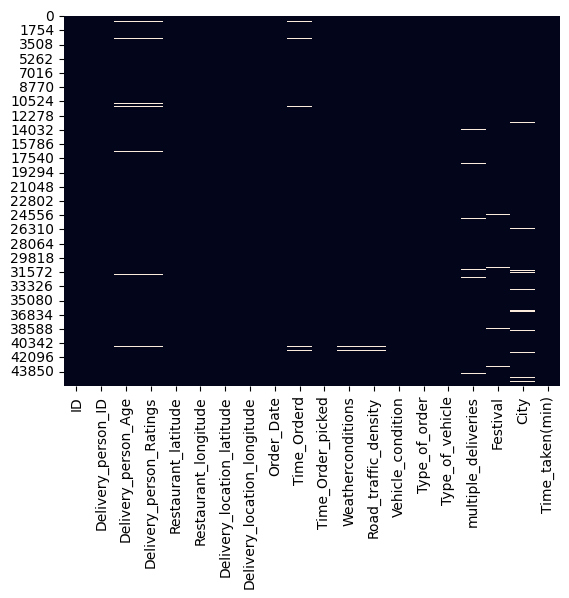

In [ ]:
import seaborn as sns

sns.heatmap(df.isnull(), cbar=False) # genero un heatmap como otra forma de ver los valores nulos pero mas visual


In [ ]:
# Reemplazar '(min)' y paréntesis con una cadena vacía ''
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace('(min)', '').str.replace('(', '').str.replace(')', '').str.strip()

# Convertir los valores a números enteros
df['Time_taken(min)'] = df['Time_taken(min)'].astype(int)
df['Time_taken(min)']

<ipython-input-10-cf71c465a275>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time_taken(min)'] = df['Time_taken(min)'].str.replace('(min)', '').str.replace('(', '').str.replace(')', '').str.strip()
<ipython-input-10-cf71c465a275>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Time_taken(min)'] = df['Time_taken(min)'].str.replace('(min)', '').str.replace('(', '').str.replace(')', '').str.strip()


0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int64

In [ ]:
df['Time_taken(min)']= df['Time_taken(min)'].astype(float) #ahora tengo el tiempo en un formato correcto

In [ ]:
#creo la columna distancias como la diferenci entre lat y long del restaurant y del punto de entrega
cols=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']
for col in cols:
    df[col]= abs(df[col])

In [ ]:
from geopy.distance import geodesic
import gc

df['distancia']=np.zeros(len(df))
restaurant_cordinates_df=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_location_cordinates_df=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()

for i in range(len(df)):
    df['distancia'].loc[i]=geodesic(restaurant_cordinates_df[i],delivery_location_cordinates_df[i])

<ipython-input-13-f635caafc644>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distancia'].loc[i]=geodesic(restaurant_cordinates_df[i],delivery_location_cordinates_df[i])


In [ ]:
#convierto a numero float la distancia en km
df['distancia']=df['distancia'].astype("str").str.extract('(\d+)')
df['distancia']=df['distancia'].astype("float64")

df['distancia']

0         3.0
1        20.0
2         1.0
3         7.0
4         6.0
         ... 
45588     1.0
45589    10.0
45590     4.0
45591     6.0
45592    12.0
Name: distancia, Length: 45593, dtype: float64

In [ ]:
#describo con medidas de tendencia central y de dispersión Time_taken(min) que es una variable cuantitativa continua.
df['Time_taken(min)'].describe()

count    45593.000000
mean        26.294607
std          9.383806
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: Time_taken(min), dtype: float64

In [ ]:
df['Time_taken(min)'].median()

26.0

In [ ]:
df['Time_taken(min)'].mode()

0    26.0
Name: Time_taken(min), dtype: float64

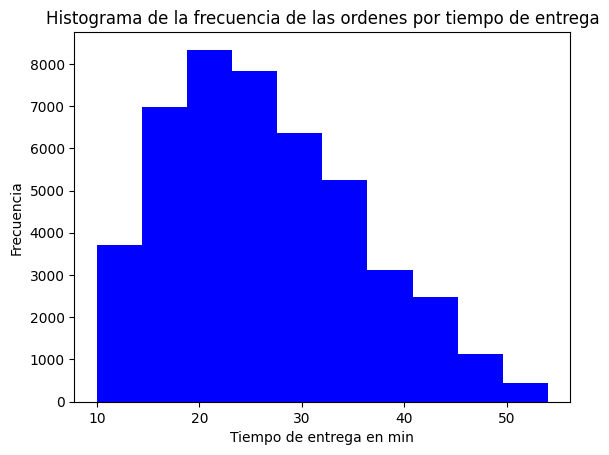

In [ ]:
#Grafico Univariado de tiempos - histograma para ver la frecuencia de tiempos

fig, ax= plt.subplots()

plt.hist(df['Time_taken(min)'],color = 'blue')
plt.xlabel('Tiempo de entrega en min')
plt.ylabel('Frecuencia')
plt.title("Histograma de la frecuencia de las ordenes por tiempo de entrega")
plt.show()

A partir de las medidas puedo ver que esta variable cuatitativa continua tiene una media, mediana y moda muy similares (cerca de 26 minutos)
Pero al hacer deep dive, el grafico muestra una distribución asimétrica.

In [ ]:
#describo con medidas de tendencia central y de dispersión distancia que es una variable cuantitativa continua.
df['distancia'].describe()

count    45593.000000
mean         9.246003
std          5.566115
min          1.000000
25%          4.000000
50%          9.000000
75%         13.000000
max         20.000000
Name: distancia, dtype: float64

In [ ]:
df['distancia'].mode()

0    7.0
Name: distancia, dtype: float64

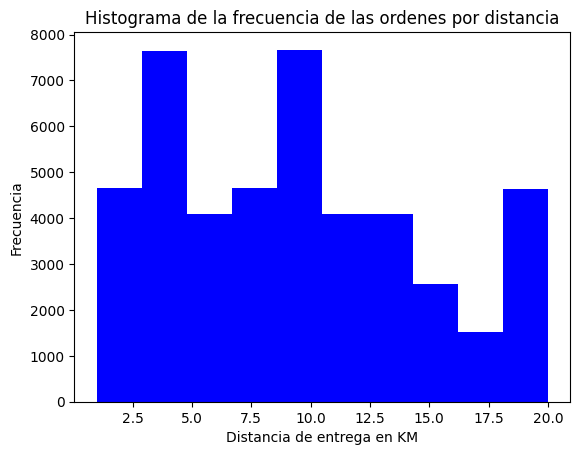

In [ ]:
#Gráfico univariado de distancias
fig, ax= plt.subplots()

plt.hist(df['distancia'],color = 'blue')
plt.xlabel('Distancia de entrega en KM')
plt.ylabel('Frecuencia')
plt.title("Histograma de la frecuencia de las ordenes por distancia")
plt.show()

la distancia es una variable cuantitativa continua. A partir de las medidas veo que la mediana y la media son iguales (9) pero la moda un tanto menor (7). Los valores parecen ser dispares.
El gráfico muestra que es asimetrico y por momentos Uniforme, hay muchos valores que se parecen entre si, con 3 picos en distancias cercanas a 3,9,19)

In [ ]:
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].astype("float64") # convierto a numero flotante el rating
df['Delivery_person_Ratings']

0        4.9
1        4.5
2        4.4
3        4.7
4        4.6
        ... 
45588    4.8
45589    4.6
45590    4.9
45591    4.7
45592    4.9
Name: Delivery_person_Ratings, Length: 45593, dtype: float64

In [ ]:
df['Delivery_person_Age']=df['Delivery_person_Age'].astype("float64")# convierto a numero flotante la edad
df['Delivery_person_Age']

0        37.0
1        34.0
2        23.0
3        38.0
4        32.0
         ... 
45588    30.0
45589    21.0
45590    30.0
45591    20.0
45592    23.0
Name: Delivery_person_Age, Length: 45593, dtype: float64

In [ ]:
df['Delivery_person_Ratings'].describe()

count    43685.000000
mean         4.633780
std          0.334716
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: Delivery_person_Ratings, dtype: float64

In [ ]:
df['Delivery_person_Age'].describe()

count    43739.000000
mean        29.567137
std          5.815155
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: Delivery_person_Age, dtype: float64

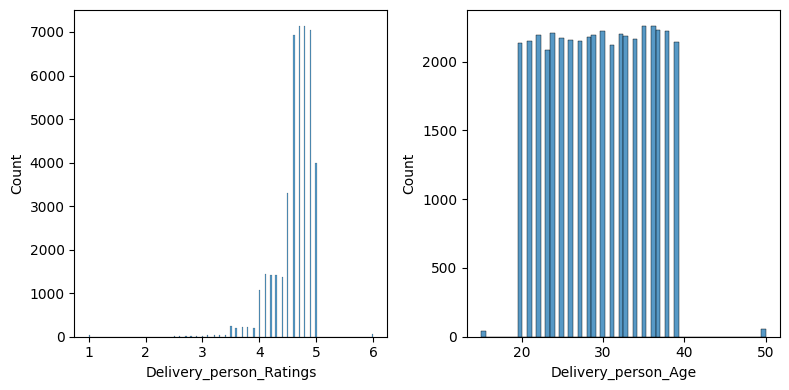

In [ ]:

f, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(x=df['Delivery_person_Ratings'], legend=False, ax=axs[0])
sns.histplot(x=df['Delivery_person_Age'],  legend=False, ax=axs[1])
f.tight_layout()

Son dos variable cuantitativas continuas. A partir de sus histogramas puedo ver que el rating tiene una distribución asimétrica con una media de 4.63. Con mucha concentracion entre 4.5 y 4.9. Lo que muestra que en general los repartidores tienen buena performance.

La edad tiene una distribución uniforme entre 15 años y 50 (como outliers).Con una media de 29 años pero como es uniforme puedo ver que desde los 20 hasta cerca de los 40 años hay una similar cnatidad de repartidores por edad.

In [ ]:
#reemplazo valores nulos del rating por la media
mean_ratings = df['Delivery_person_Ratings'].mean()
df['Delivery_person_Ratings'].fillna(mean_ratings, inplace=True)

#con la edad al ser uniforme me cuesta mas decidir que hacer pero reemplaco por la media
mean_ratings = df['Delivery_person_Age'].mean()
df['Delivery_person_Age'].fillna(mean_ratings, inplace=True)


In [ ]:
df['City'] = df['City'].dropna() #elimino valores nulos de las variables cualitativas
df['Festival'] = df['Festival'].dropna()
df['Type_of_order'] = df['Type_of_order'].dropna()
df['Type_of_vehicle'] = df['Type_of_vehicle'].dropna()
df['Road_traffic_density'] = df['Road_traffic_density'].dropna()
df['Weatherconditions'] = df['Weatherconditions'].dropna()

<Axes: title={'center': 'City'}, ylabel='City'>

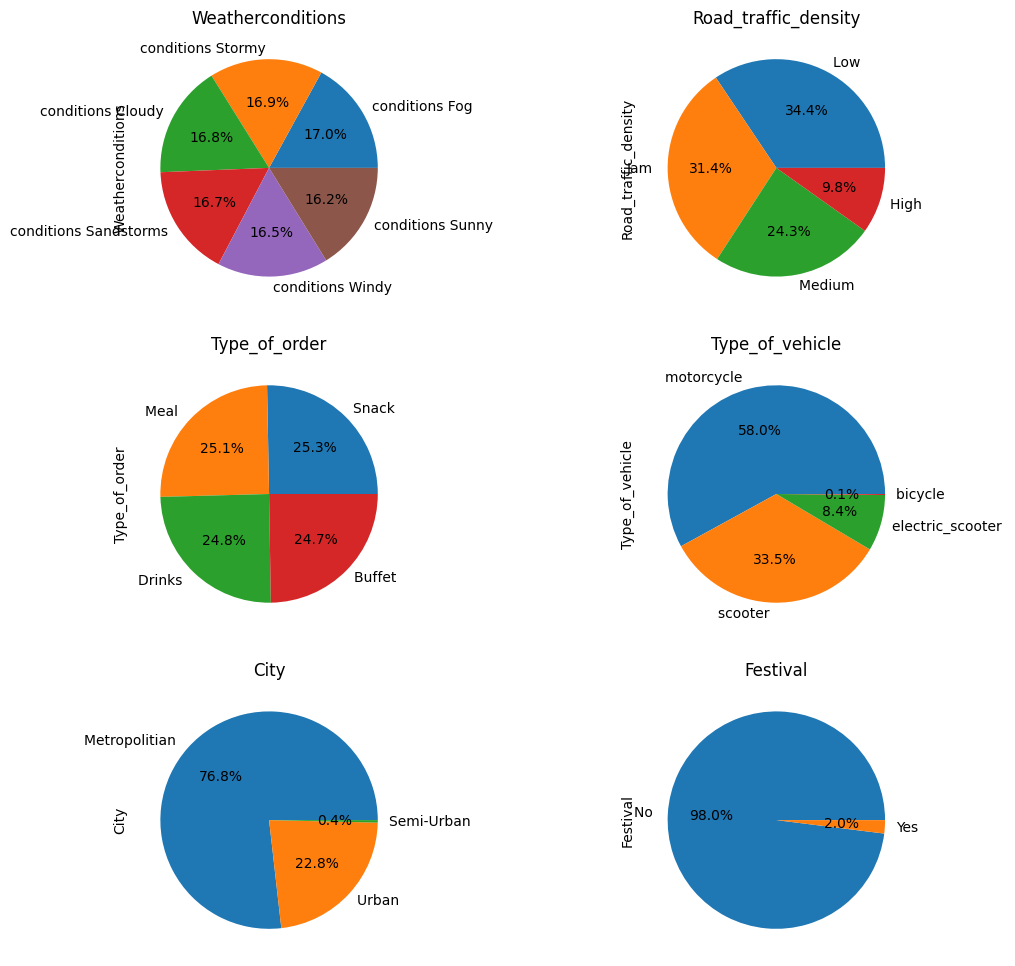

In [ ]:
fig, axes = plt.subplots(3,2, figsize = (12,12)) # creo grafico de las variables cualitativas

df['Weatherconditions'].value_counts().plot(kind='pie', ax=axes[0, 0], title='Weatherconditions', autopct='%1.1f%%')
df['Road_traffic_density'].value_counts().plot(kind='pie', ax=axes[0, 1], title='Road_traffic_density', autopct='%1.1f%%')
df['Type_of_order'].value_counts().plot(kind='pie', ax=axes[1, 0], title='Type_of_order', autopct='%1.1f%%')
df['Type_of_vehicle'].value_counts().plot(kind='pie', ax=axes[1, 1], title='Type_of_vehicle', autopct='%1.1f%%')
df['Festival'].value_counts().plot(kind='pie', ax=axes[2, 1], title='Festival', autopct='%1.1f%%')
df['City'].value_counts().plot(kind='pie', ax=axes[2, 0], title='City', autopct='%1.1f%%')



Utilicé los gráficos de torta para describir a las variables cualitativas del dataset.

**Weatherconditions:** se distribuyen d euna forma demasiado simetrica, casi que tenemos el mismo porcentaje para todos los climas.

**type of order:** ocurre lo mismo que en el clima

**City**: veo que la mayor cantidad de ordenes se dieron en áreas metropolitanas, en segundo lugar en áreas urbanas, y muy poco (0.4%) en Semi urbanas.

**Road traffic density:** El mayor porcentaje de órdenes en Low, luego en jam, luego en medium y luego en high. asique puedo pensar que es una ciudad con no tanto tráfico.

**Type of vehicle**: ampliamente se han utilizado motos (58%) para entregar las órdenes, luego scooters y luego scooters eléctricos y bicicletas.

**Festival**: el 98% de las órdenes no se hizo durante un dia festivo

In [ ]:
#elimino valores nulos faltantes. En este caso elijo eliminar ya que son categoricas, no puedo convertir a media,+ tiempo de la orden
df.dropna(subset=['Time_Orderd', 'Weatherconditions', 'Road_traffic_density', 'multiple_deliveries', 'Festival', 'City'], inplace=True)


In [ ]:
#consulto valores nulos de mi dataset --> ya no tengo valores nulos

df.isnull().sum()
print(df.isnull().mean())

ID                             0.0
Delivery_person_ID             0.0
Delivery_person_Age            0.0
Delivery_person_Ratings        0.0
Restaurant_latitude            0.0
Restaurant_longitude           0.0
Delivery_location_latitude     0.0
Delivery_location_longitude    0.0
Order_Date                     0.0
Time_Orderd                    0.0
Time_Order_picked              0.0
Weatherconditions              0.0
Road_traffic_density           0.0
Vehicle_condition              0.0
Type_of_order                  0.0
Type_of_vehicle                0.0
multiple_deliveries            0.0
Festival                       0.0
City                           0.0
Time_taken(min)                0.0
distancia                      0.0
dtype: float64


In [ ]:
df.shape #reduci la cantidad de columnas y aun tengo una cantidad significativa de filas

(41616, 21)

In [ ]:
df.dtypes #ahora las columans tienen el tipo correcto

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                float64
distancia                      float64
dtype: object

In [ ]:
df.duplicated() #consulto si tengo duplicados

0        False
1        False
2        False
3        False
4        False
         ...  
45588    False
45589    False
45590    False
45591    False
45592    False
Length: 41616, dtype: bool

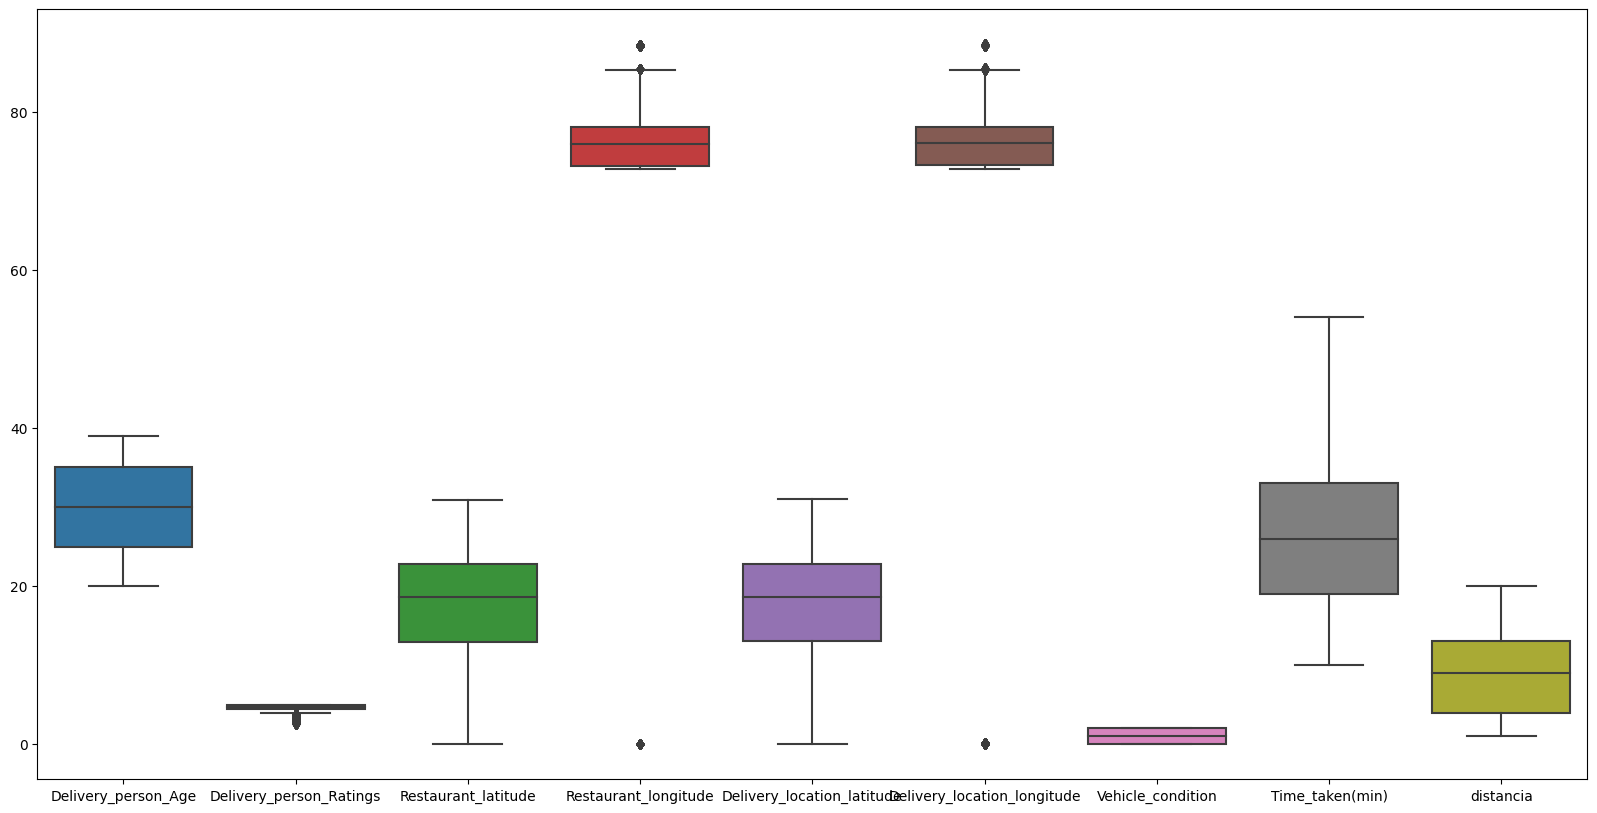

In [ ]:
#Chequeo outliers pero veo que no tiene sentido este primer grafico con todas las variables juntas
plt.figure(figsize=(20, 10))

# Crear el boxplot utilizando Seaborn
sns.boxplot(data=df)

# Mostrar el gráfico
plt.show()


In [ ]:
# convierto variables de hora a objetos timedelta
df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])

# convierto a números enteros que serian la cantidad de segundos transcurridos desde la medianoche
df['Time_Orderd'] = df['Time_Orderd'].dt.seconds
df['Time_Order_picked'] = df['Time_Order_picked'].dt.seconds

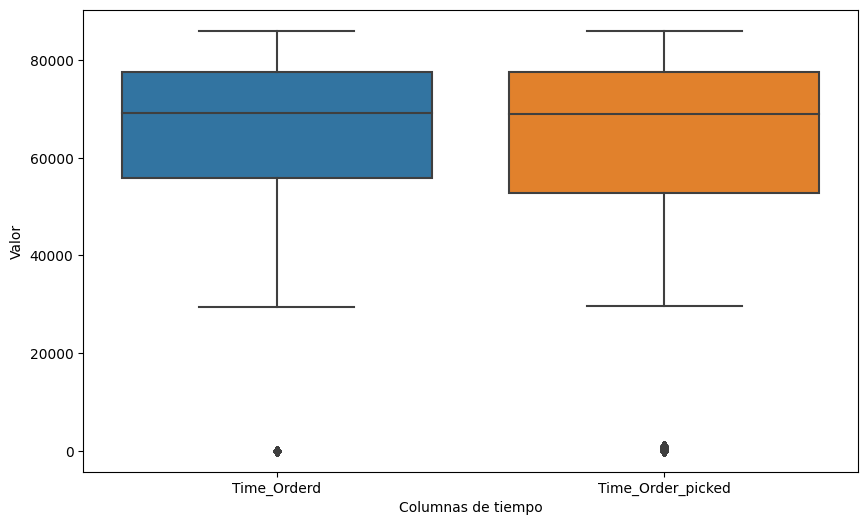

In [ ]:
plt.figure(figsize=(10, 6))

# Creo el primer boxplot con las columnas de tiempo con misma escala
time_columns = ['Time_Orderd', 'Time_Order_picked']
df_time = df[time_columns]
sns.boxplot(data=df_time)


plt.xlabel('Columnas de tiempo')
plt.ylabel('Valor')


plt.show()



In [ ]:
#veo que hay outliers asique los calculo


# Calculo el rango intercuartílico (IQR)
Q1 = df['Time_Orderd'].quantile(0.25)
Q3 = df['Time_Orderd'].quantile(0.75)
IQR = Q3 - Q1

# Identifico los outliers en 'Time_Ordered'
outliers_orderd = np.logical_or(df['Time_Orderd'] < (Q1 - 1.5 * IQR), df['Time_Orderd'] > (Q3 + 1.5 * IQR))
num_outliers_orderd = outliers_orderd.sum()


# Calculo el rango intercuartílico (IQR)
Q1 = df['Time_Order_picked'].quantile(0.25)
Q3 = df['Time_Order_picked'].quantile(0.75)
IQR = Q3 - Q1

# Identifico los outliers en 'Time_Order_picked'
outliers_picked = np.logical_or(df['Time_Order_picked'] < (Q1 - 1.5 * IQR), df['Time_Order_picked'] > (Q3 + 1.5 * IQR))
num_outliers_picked = outliers_picked.sum()

# Imprimir el número de outliers en cada columna
print(f"Número de outliers en 'Time_Ordered': {num_outliers_orderd}")
print(f"Número de outliers en 'Time_Order_picked': {num_outliers_picked}")

Número de outliers en 'Time_Ordered': 404
Número de outliers en 'Time_Order_picked': 1178


Decido finalmente conservar estas filas ya que puede ser que las ordenes hayan sido creadas o recogidas en distintos horarios y no afecta el analisis




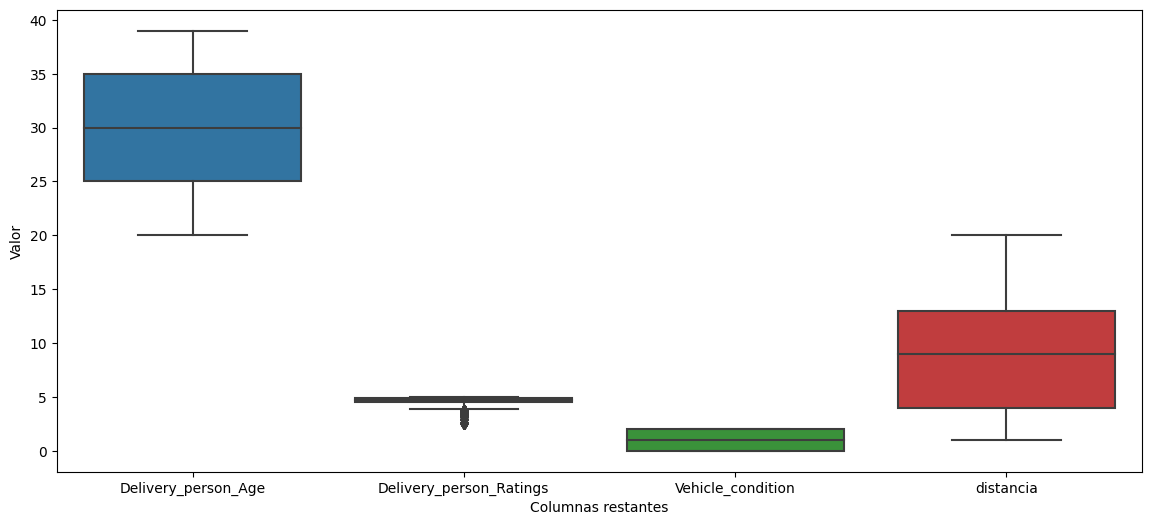

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(14, 6))

# Creo el segundo boxplot con las columnas restantes
other_columns = [
    'Delivery_person_Age', 'Delivery_person_Ratings',
    'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
    'multiple_deliveries', 'Festival', 'City', 'distancia'

]
df_other = df[other_columns]
sns.boxplot(data=df_other)


plt.xlabel('Columnas restantes')
plt.ylabel('Valor')

plt.show()

In [ ]:
#los outliers que me llaman la atencion son los de rating asique calculo cuantos son
# Calculo el rango intercuartílico (IQR)
Q1 = df['Delivery_person_Ratings'].quantile(0.25)
Q3 = df['Delivery_person_Ratings'].quantile(0.75)
IQR = Q3 - Q1

# Identifico los outliers en 'Delivery_person_Ratings'
outliers_Delivery_person_Ratings = np.logical_or(df['Delivery_person_Ratings'] < (Q1 - 1.5 * IQR), df['Delivery_person_Ratings'] > (Q3 + 1.5 * IQR))
num_outliers_rating = outliers_Delivery_person_Ratings.sum()

# Imprimir el número de outliers en cada columna
print(f"Número de outliers en 'Delivery_person_Ratings': {num_outliers_rating}")

Número de outliers en 'Delivery_person_Ratings': 1099


In [ ]:
#decido cambiarlos por la media ya que los valores estan concentrados y prefieorn no perder estas filas
mean = df['Delivery_person_Ratings'].mean()
df.loc[outliers_Delivery_person_Ratings, 'Delivery_person_Ratings'] = mean


In [ ]:
df.info() # chequeo final

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41616 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           41616 non-null  object 
 1   Delivery_person_ID           41616 non-null  object 
 2   Delivery_person_Age          41616 non-null  float64
 3   Delivery_person_Ratings      41616 non-null  float64
 4   Restaurant_latitude          41616 non-null  float64
 5   Restaurant_longitude         41616 non-null  float64
 6   Delivery_location_latitude   41616 non-null  float64
 7   Delivery_location_longitude  41616 non-null  float64
 8   Order_Date                   41616 non-null  object 
 9   Time_Orderd                  41616 non-null  int64  
 10  Time_Order_picked            41616 non-null  int64  
 11  Weatherconditions            41616 non-null  object 
 12  Road_traffic_density         41616 non-null  object 
 13  Vehicle_conditio

# **Gráficos bivariados para entender la relación de las variables con el tiempo en minutos**

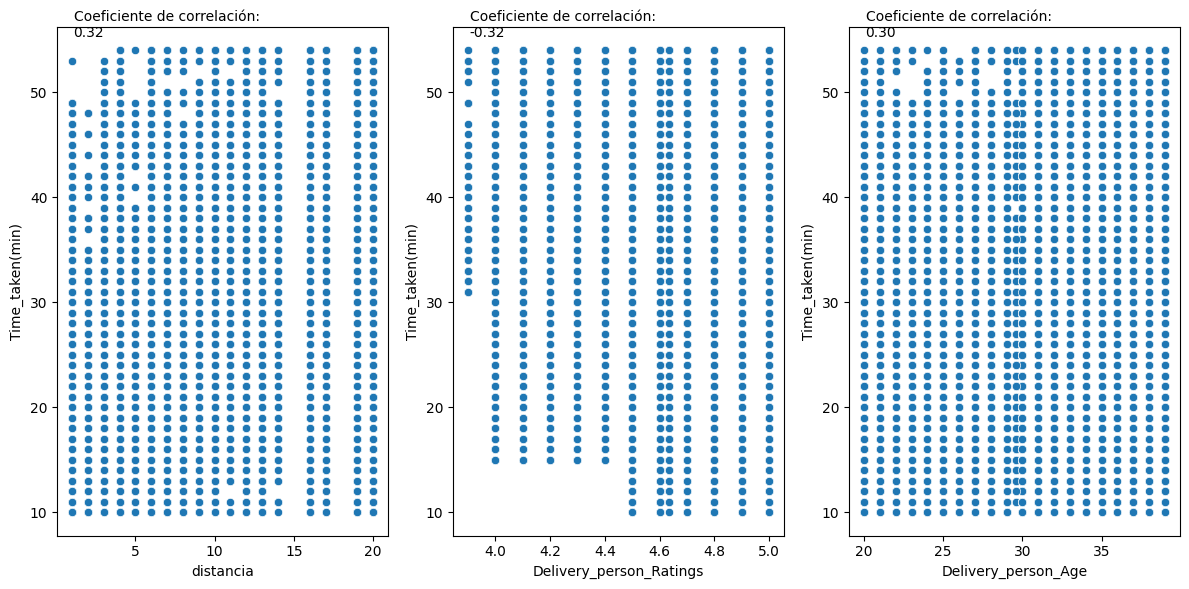

In [ ]:
#creo los gráficos de la relacion de las variables cuantitativas  con el tiempo de las órdenes

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Primer gráfico
sns.scatterplot(data=df, x="distancia", y="Time_taken(min)", ax=axes[0])
corr_coef = np.corrcoef(df["distancia"], df["Time_taken(min)"])[0, 1]
axes[0].text(0.05, 0.98, f"Coeficiente de correlación:\n{corr_coef:.2f}", transform=axes[0].transAxes)

# Segundo gráfico
sns.scatterplot(data=df, x="Delivery_person_Ratings", y="Time_taken(min)", ax=axes[1])
corr_coef = np.corrcoef(df["Delivery_person_Ratings"], df["Time_taken(min)"])[0, 1]
axes[1].text(0.05, 0.98, f"Coeficiente de correlación:\n{corr_coef:.2f}", transform=axes[1].transAxes)

# Tercer gráfico
sns.scatterplot(data=df, x="Delivery_person_Age", y="Time_taken(min)", ax=axes[2])
corr_coef = np.corrcoef(df["Delivery_person_Age"], df["Time_taken(min)"])[0, 1]
axes[2].text(0.05, 0.98, f"Coeficiente de correlación:\n{corr_coef:.2f}", transform=axes[2].transAxes)

plt.tight_layout()
plt.show()



En los tres gráficos no veo mucha correlacion.

En el de la relación con la distancia al tener un coeficiente de correlacion de 0.32 puedo pensar que hay una muy leve correlacion positiva entre las dos variables, por lo que podría decir que hay una tendencia a que a medida que aumenta la distancia aumente el tiempo, pero es muy baja esa tendencia.


> **Esto no contradice mi hipótesis de que la distancia era uno de los factores que mas impactaba el tiempo de las órdenes. Que a mas distancia mas tiempo, pero tampoco es muy consistente porque muestra una correlacion muy baja**

En el de la relación con el rating del repartidor tiene un coeficiente negativo y veo que no hay mucha relacion entre ambas. hay una leve correlacion negativa, por lo que hay una tendencia a que cuando el tiempo aumenta el rating baja.

> **Esto no contradice o mi hipótesis de que el rating impacta al tiempo de las órdenes. Que a menor rating mas tiempo, pero tampoco es muy consistente porque muestra una correlacion muy baja**

En el de la relación con la edad muestra una correlacion similar al de la distancia, correlacion muy leve positiva, por lo que hay una leve tendencia a que cuando aumenta la edad tarden mas tiempo.

> **Esto no contradice mi hipótesis de que la edad impacta al tiempo de las órdenes. Que a mayor mas tiempo, pero tampoco es muy consistente porque muestra una correlacion muy baja**


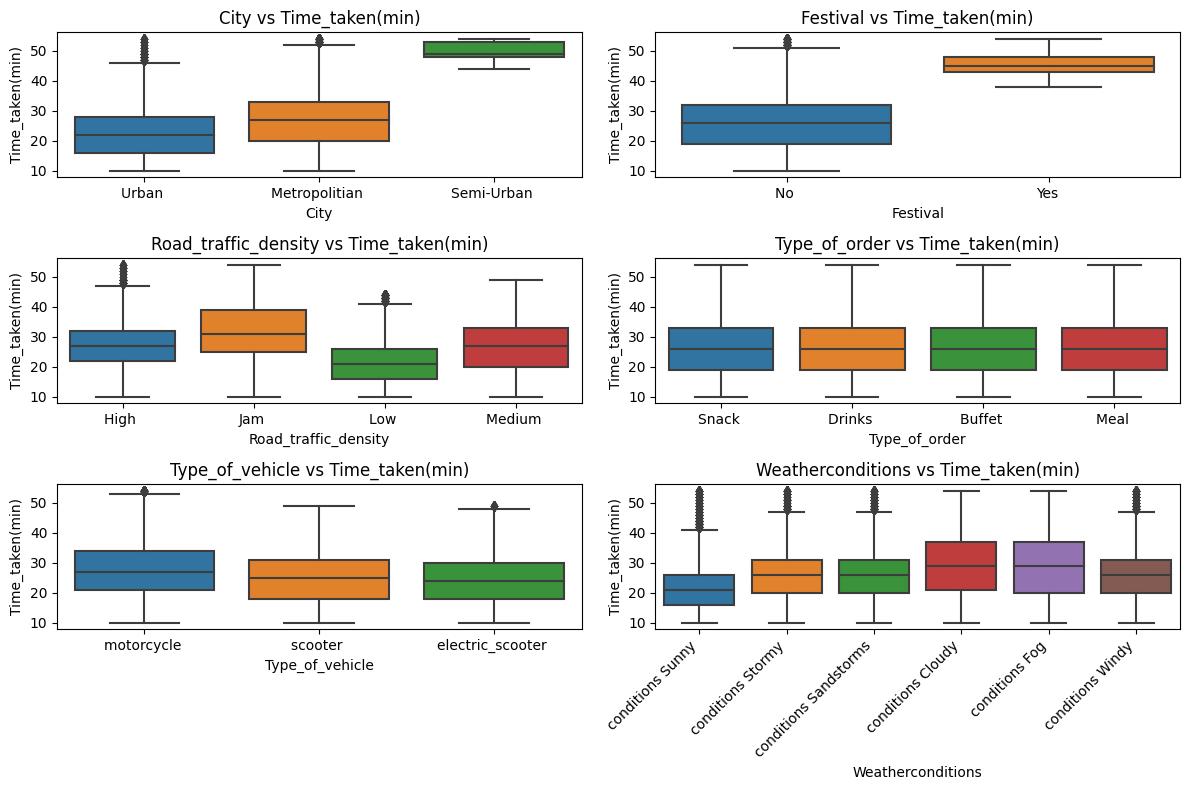

In [ ]:
#creo los gráficos de la relacion de las variables cualitativas con el tiempo de las órdenes
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

sns.boxplot(data=df, x="City", y="Time_taken(min)", ax=axes[0][0])
axes[0][0].set_title("City vs Time_taken(min)")

sns.boxplot(data=df, x="Festival", y="Time_taken(min)", ax=axes[0][1])
axes[0][1].set_title("Festival vs Time_taken(min)")

sns.boxplot(data=df, x="Road_traffic_density", y="Time_taken(min)", ax=axes[1][0])
axes[1][0].set_title("Road_traffic_density vs Time_taken(min)")

sns.boxplot(data=df, x="Type_of_order", y="Time_taken(min)", ax=axes[1][1])
axes[1][1].set_title("Type_of_order vs Time_taken(min)")

sns.boxplot(data=df, x="Type_of_vehicle", y="Time_taken(min)", ax=axes[2][0])
axes[2][0].set_title("Type_of_vehicle vs Time_taken(min)")

sns.boxplot(data=df, x="Weatherconditions", y="Time_taken(min)", ax=axes[2][1])
axes[2][1].set_title("Weatherconditions vs Time_taken(min)")
axes[2][1].set_xticklabels(axes[2][1].get_xticklabels(), rotation=45, ha="right")


plt.tight_layout()
plt.show()


**Relacion entre city y tiempo**: el tipo de ciudad impacta al tiempo. Veo que en areas semi urbanas el tiempo es mayor,mientras en las urbana es menor pero con mayor distribucion de los valores, la distancia entre los bigotes es mayor. En lareas metropolitanas es donde la distancia entre bigotes es mayores, es decir hay mas amplitud de valores de tiempo, y una media mayor que en urbanas pero menor que en semi urbanas.

**Relacion entre festival y tiempo** puedo decir que cambia mucho el tiempo en base a si hay un festivo o no. cuando es yes, el tiempo aumenta.

**Relacion entre traffic density y tiempo** el tráfico afecta al tiempo. Cuando es low veo que los tiempos son menores y cuando es jam son mayores. Tambien tienen distintas medias en base al trafico

**Relacion entre type of order y tiempo** veo que no afecta al tiempo. Casi que sin importar el tipo de orden se tarda lo mismo en entregarse, el tiempo se comporta de forma muy similar.

**Relacion entre type of vehicle y tiempo** sucede algo similar que con type of order pero veo que las cajas de scooter y electric scooter muestran menos tiempo. por lo que podria decir que las motos y bicis ddemoran un poco mas aunque no tiene gran impacto esta variable.

**Relacion entre weather conditions y tiempo** veo que el clima afecta al tiempo. en condiciones cloudy o fog se tiende a tardar mas, aunque tambien tienen mayor amplitud sus cajas, por lo que puede suceder que que se tarde menos de lo pensado. En condiciones sunny es cuando menos se tarda

luego de revisar los resultados puedo decir que hay variables que impactan en el tiempo pero la correlacion es menor a la que yo esperaba.

<ipython-input-45-57091c194921>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

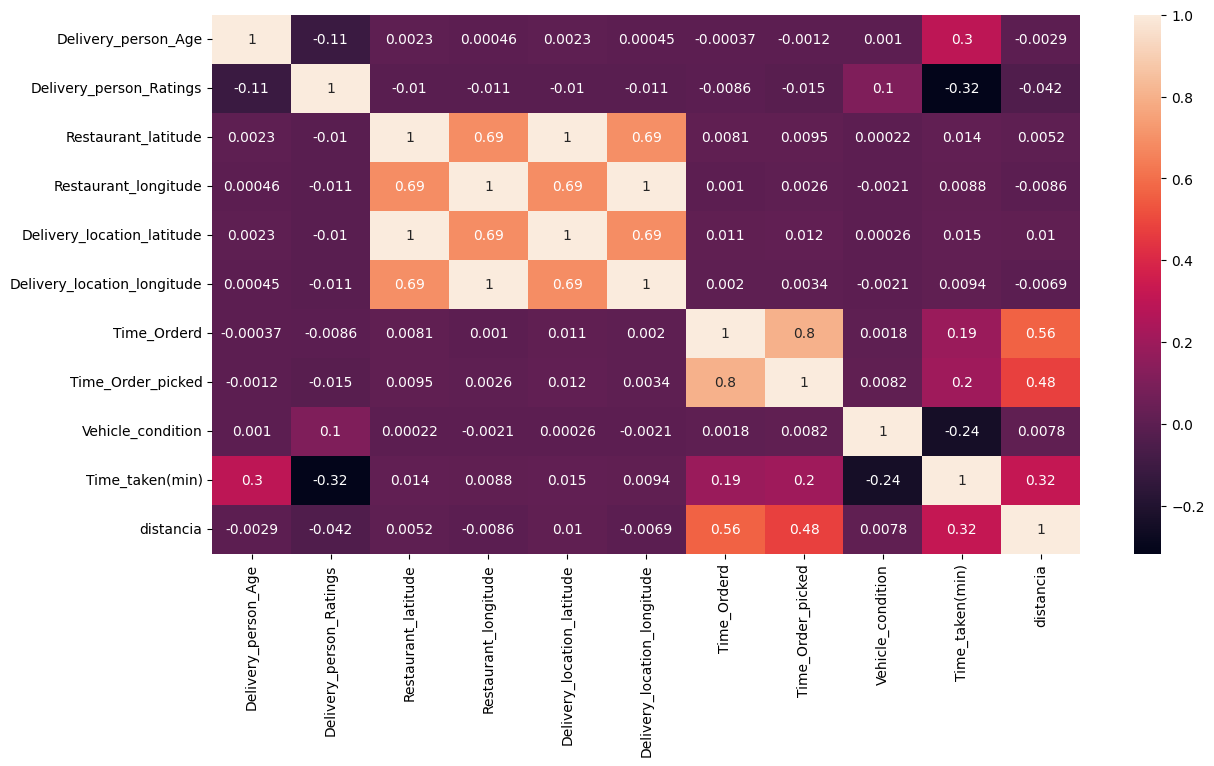

In [ ]:
#CREO heatmap para ver la correlacion entre todas las variables cuantitativas para ampliar la información
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

Luego de los analisis puedo ver que mi suposicion de que time taken iba a estar mas correlacionada con la distancia, la edad y el rating es efectivamente asi, estas variables tienen mas correlacion en los dos primeros casos positiva y en el tercero negativa como ya habia desarrollado. Aunque esto no muestra fuerte correlación, veo que para el resto de variables hay menos correlacion.

tambien es interesante la correlacion positiva entre time ordered y distancia.Y con time order picked
Luego quienes tienen mas correlacion son las latitudes y longitudes, pero esto no aporta informacion al análisis.

# Feature Engineering

In [ ]:
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                      int64
Time_Order_picked                int64
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                float64
distancia                      float64
dtype: object

In [ ]:
#consulto valores nulos de mi dataset

df.isnull().sum()
print(df.isnull().mean())

ID                             0.0
Delivery_person_ID             0.0
Delivery_person_Age            0.0
Delivery_person_Ratings        0.0
Restaurant_latitude            0.0
Restaurant_longitude           0.0
Delivery_location_latitude     0.0
Delivery_location_longitude    0.0
Order_Date                     0.0
Time_Orderd                    0.0
Time_Order_picked              0.0
Weatherconditions              0.0
Road_traffic_density           0.0
Vehicle_condition              0.0
Type_of_order                  0.0
Type_of_vehicle                0.0
multiple_deliveries            0.0
Festival                       0.0
City                           0.0
Time_taken(min)                0.0
distancia                      0.0
dtype: float64


In [ ]:
df.shape

(41616, 21)

In [ ]:
#cambio type d emis variables categoricas a numericas con label enconder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


# Label Encoding para la variable categórica Weatherconditions
df['Weatherconditions'] = le.fit_transform(df['Weatherconditions'])

# Label Encoding para la variable categórica Road_traffic_density
df['Road_traffic_density'] = le.fit_transform(df['Road_traffic_density'])

# Label Encoding para la variable categórica Type_of_order
df['Type_of_order'] = le.fit_transform(df['Type_of_order'])

# Label Encoding para la variable categórica Type_of_vehicle
df['Type_of_vehicle'] = le.fit_transform(df['Type_of_vehicle'])

# Label Encoding para la variable categórica multiple_deliveries
df['multiple_deliveries'] = le.fit_transform(df['multiple_deliveries'])

# Label Encoding para la variable categórica Festival
df['Festival'] = le.fit_transform(df['Festival'])

# Label Encoding para la variable categórica City
df['City'] = le.fit_transform(df['City'])


In [ ]:
# Elimino columnas ID y Delivery_person_ID ya que no son relevantes para la regresion, son identificadores unicos.
df = df.drop(["ID", "Delivery_person_ID"], axis=1)

In [ ]:
# convierto variables de hora a objetos timedelta
df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])

# convierto a números enteros que serian la cantidad de segundos transcurridos desde la medianoche
df['Time_Orderd'] = df['Time_Orderd'].dt.seconds
df['Time_Order_picked'] = df['Time_Order_picked'].dt.seconds

In [ ]:
# convierto la fecha a valor numerico
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Year'] = df['Order_Date'].dt.year.astype(int)
df['Order_Month'] = df['Order_Date'].dt.month.astype(int)
df['Order_Day'] = df['Order_Date'].dt.day.astype(int)


<ipython-input-52-a489811fa645>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])


In [ ]:
# Elimino columna order date ya que ya cree las otras
df = df.drop(["Order_Date"], axis=1)

In [ ]:
# Elimino columnas lat/long ya que ya las utilice para crear la columna distancias y ya no aportaran nada.
df = df.drop(["Restaurant_latitude","Restaurant_longitude","Delivery_location_longitude","Delivery_location_latitude"], axis=1)

In [ ]:
# ahora ya no tengo vairables que no sean numeros y puedo continuar con
df.dtypes

Delivery_person_Age        float64
Delivery_person_Ratings    float64
Time_Orderd                  int64
Time_Order_picked            int64
Weatherconditions            int64
Road_traffic_density         int64
Vehicle_condition            int64
Type_of_order                int64
Type_of_vehicle              int64
multiple_deliveries          int64
Festival                     int64
City                         int64
Time_taken(min)            float64
distancia                  float64
Order_Year                   int64
Order_Month                  int64
Order_Day                    int64
dtype: object

# Feature selection



In [ ]:
#forward selection
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
#creo x e y
X = X = df.drop('Time_taken(min)', axis=1)       # feature matrix
y = df['Time_taken(min)']          # target feature.

In [ ]:
X

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distancia,Order_Year,Order_Month,Order_Day
0,37.0,4.9,0,0,4,0,2,3,1,0,0,2,3.0,2022,3,19
1,34.0,4.5,0,0,3,1,2,3,2,1,0,0,20.0,2022,3,25
2,23.0,4.4,0,0,2,2,0,1,1,1,0,2,1.0,2022,3,19
3,38.0,4.7,0,0,4,3,0,0,1,1,0,0,7.0,2022,5,4
4,32.0,4.6,0,0,0,0,1,3,2,1,0,0,6.0,2022,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,0,0,5,0,1,2,1,0,0,0,1.0,2022,3,24
45589,21.0,4.6,0,0,5,1,0,0,1,1,0,0,10.0,2022,2,16
45590,30.0,4.9,0,0,0,2,1,1,2,0,0,0,4.0,2022,11,3
45591,20.0,4.7,0,0,0,0,0,3,1,1,0,0,6.0,2022,7,3


In [ ]:
y

0        24.0
1        33.0
2        26.0
3        21.0
4        30.0
         ... 
45588    32.0
45589    36.0
45590    16.0
45591    26.0
45592    36.0
Name: Time_taken(min), Length: 41616, dtype: float64

In [ ]:
# aplico x e y con un nivel de significancia de 0.05
forward_selection(X,y)

<ipython-input-56-46829249b7e9>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-56-46829249b7e9>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-56-46829249b7e9>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-56-46829249b7e9>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-56-46

['Delivery_person_Age',
 'Road_traffic_density',
 'Festival',
 'distancia',
 'Order_Year',
 'Delivery_person_Ratings',
 'Weatherconditions',
 'Vehicle_condition',
 'multiple_deliveries',
 'City',
 'Type_of_vehicle',
 'Order_Month']

In [ ]:
# para probar lo implemento tambien usando librerias de python
!pip install mlxtend

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs) elijo k_features=12 porque en el anterior me devolvio 14 columnas
sfs = SFS(LinearRegression(),
          k_features=12,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features

('Delivery_person_Age',
 'Delivery_person_Ratings',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'distancia',
 'Order_Month',
 'Order_Day')

Las que me recomienda quedarme son:
'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'distancia',
 'Order_Month',
 'Order_Day'


Probare con stepwise

In [ ]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

Despues de implementar las distintas metodos puedo decir que estos arrojan que las mas importantes son :


('Delivery_person_Age',

 'Delivery_person_Ratings',

 'Time_Orderd',

 'Time_Order_picked',

 'Weatherconditions',

 'Road_traffic_density',

 'Vehicle_condition',

 'Type_of_order',

 'Type_of_vehicle',

 'multiple_deliveries',

 'Festival',

 'City',

 'distancia',

 'Order_Month')

--------



Por lo que las que no aportan valor y puedo precindir son:
Order_year y order_day

 A las que ya elimine (order date, id, courier id, ambas latitudes y ambas longitudes) deberia agregar las que me dice que no aportan valor.

In [ ]:
# Elimino columnas order year y day aparece asi porque la volvi a correr
df = df.drop(["Order_Year","Order_Day"], axis=1)


In [ ]:
df.dtypes # final

Delivery_person_Age        float64
Delivery_person_Ratings    float64
Time_Orderd                  int64
Time_Order_picked            int64
Weatherconditions            int64
Road_traffic_density         int64
Vehicle_condition            int64
Type_of_order                int64
Type_of_vehicle              int64
multiple_deliveries          int64
Festival                     int64
City                         int64
Time_taken(min)            float64
distancia                  float64
Order_Month                  int64
dtype: object

# Selección de algoritmo
Como el objetivo de este proyecto es desarrollar un modelo de análisis predictivo que permita estimar el tiempo de entrega de un pedido en función de diferentes variables, utilizaré un algoritmo de regresión lineal para entrenar con los datos que tengo.

# CALCULO DE METRICAS


In [ ]:
#creo x e y
X = X = df.drop('Time_taken(min)', axis=1)       # feature matrix
y = df['Time_taken(min)']          # target feature.

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 5.3454530501504705


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.4824457338619773


el MAE si bien esta en la misma unidad de mi variable (minutos)prefiero utilizar el r2 ya que es mas claro su resultado



Con este valor para r2 no puedo decir que es un buen modelo, en el 50% de los casos predecira bien y en el otro 50% predecira mal...

Por otro lado puedo decir que no esta ni overfitiado ni underfitiado, no tiene esos problemas.

# PCA

Había empezado con 21 variables, ya reduci a 15. Con las que empiezo el PCA

In [ ]:

#Preprocesamiento creo x e y
X = X = df.drop('Time_taken(min)', axis=1)       # feature matrix todas menos time taken
y = df['Time_taken(min)']          # target feature. Time taken, la que quiero predecir

In [ ]:
#Separo en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Normalizo los datos para que PCA funcione mejor
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Aplico PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.23470043e-01, 9.65331993e-02, 9.46704512e-02, 8.63519898e-02,
       8.34585023e-02, 8.27997178e-02, 8.05818938e-02, 7.93822902e-02,
       7.49495202e-02, 7.06212212e-02, 6.80451660e-02, 5.91360051e-02,
       4.14180924e-34, 2.79689811e-35])

In [ ]:
#lOS CONVIERTO A % QUE EN NOTACION CIENTIFICA ES MAS DIFICIL DE ENTENDER

import numpy as np

explained_variance_array = np.array([
    1.14620127e-01, 1.13970091e-01, 8.86396927e-02, 8.66423843e-02,
    7.97064446e-02, 7.68812579e-02, 7.48863609e-02, 7.34736743e-02,
    6.93193581e-02, 6.51947105e-02, 6.30865444e-02, 5.49711726e-02,
    3.86081820e-02, 3.71433304e-33, 2.02454930e-34, 3.13463649e-66
])

# Convertir a porcentajes
explained_variance_percentages = explained_variance_array * 100

# Imprimir los porcentajes
for percentage in explained_variance_percentages:
    print(f'{percentage:.2f}%')



11.46%
11.40%
8.86%
8.66%
7.97%
7.69%
7.49%
7.35%
6.93%
6.52%
6.31%
5.50%
3.86%
0.00%
0.00%
0.00%


Estos valores reflejan las proporciones de varianza explicada por cada componente principal. Pero en general son son extremadamente pequeños (cercanos a cero), por lo que parece que no aportan mucha informacion. El primero aporta el 11.46% y el segundo el 11.40% ya el resto menos del 10%

13 de ellos aportan muy poca informacion, y 3 nada.Lo que se comprueba en el siguiente grafico

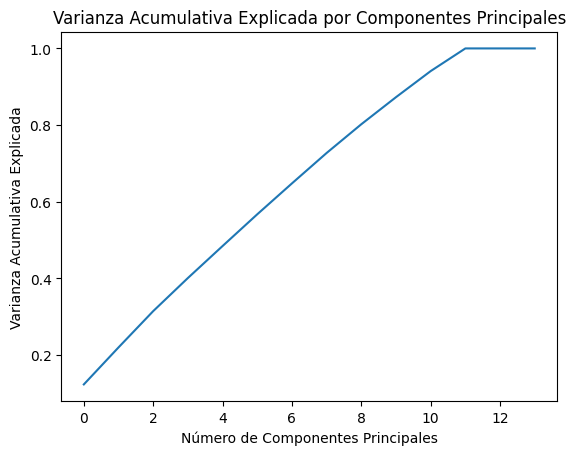

In [ ]:
import matplotlib.pyplot as plt

cumulative_variance = np.cumsum(explained_variance)
plt.plot(cumulative_variance)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulativa Explicada')
plt.title('Varianza Acumulativa Explicada por Componentes Principales')
plt.show()

Con esta información elijo entrenar un modelo de Random forest con 10 variables (84.6% de la varianza) y evaluar que tal funciona. Pase de 16 variables a 10 (mi reducción)

Solo para comparar probare el modelo con distintas cantidades de componentes

In [ ]:
#Con 14
from sklearn.decomposition import PCA

pca = PCA(n_components=14)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

In [ ]:
#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.056102835175396444


Me da una muy mala accuracy usando todas las variables -->6% Por lo que no puedo esperar que con las 10 del PCA sea mejor.


In [ ]:
#Con 10 que me indico el PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

In [ ]:
#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.058865929841422394


No hay mucha diferencia

In [ ]:
#Con 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

In [ ]:
#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.06403171552138395


por lo que veo usar 2 mejora pero es casi lo mismo que usar 14.

Pero este accuracy es demasiado bajo.

Aunque tampoco fue muy bueno creo que es mejor el resultado con feature selection y regresion lineal.

# Nuevo Feature Selection

> Agregare nuevas variables para mejorar el modelo








In [ ]:
df.info

<bound method DataFrame.info of        Delivery_person_Age  Delivery_person_Ratings  Time_Orderd  \
0                     37.0                      4.9            0   
1                     34.0                      4.5            0   
2                     23.0                      4.4            0   
3                     38.0                      4.7            0   
4                     32.0                      4.6            0   
...                    ...                      ...          ...   
45588                 30.0                      4.8            0   
45589                 21.0                      4.6            0   
45590                 30.0                      4.9            0   
45591                 20.0                      4.7            0   
45592                 23.0                      4.9            0   

       Time_Order_picked  Weatherconditions  Road_traffic_density  \
0                      0                  4                     0   
1            

In [ ]:
#creo nueva variable"Densidad_Trafico_Clima" al combinar las variables "Weatherconditions" y "Road_traffic_density".
#representará las condiciones generales en que se desarrollo cada orden
df['Densidad_Trafico_Clima'] = df['Weatherconditions'] * df['Road_traffic_density']

#Tambien creo "Velocidad_promedio" utilizando la variable que ya habia creado (distancia) y el tiempo total de la orden.
#esta variable creo que puede ser particularmente importante para el modelo,reflejará la eficiencia del repartidor en función de la velocidad

df['Velocidad_Promedio'] = df['distancia'] / df['Time_taken(min)']




# Vuelvo a hacer un PCA para ver el impacto de las nuevas variables


In [ ]:
df.dtypes

Delivery_person_Age        float64
Delivery_person_Ratings    float64
Time_Orderd                  int64
Time_Order_picked            int64
Weatherconditions            int64
Road_traffic_density         int64
Vehicle_condition            int64
Type_of_order                int64
Type_of_vehicle              int64
multiple_deliveries          int64
Festival                     int64
City                         int64
Time_taken(min)            float64
distancia                  float64
Order_Month                  int64
Densidad_Trafico_Clima       int64
Velocidad_Promedio         float64
dtype: object

In [ ]:

#Preprocesamiento creo x e y
X = X = df.drop('Time_taken(min)', axis=1)       # feature matrix todas menos time taken
y = df['Time_taken(min)']          # target feature. Time taken, la que quiero predecir

In [ ]:
#Separo en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [ ]:
#Normalizo los datos para que PCA funcione mejor
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Aplico PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.56651607e-01, 1.17234133e-01, 1.02508958e-01, 8.00637628e-02,
       7.17882270e-02, 7.13616995e-02, 7.04795888e-02, 6.96510710e-02,
       6.71816468e-02, 6.20629492e-02, 5.94917475e-02, 5.44568016e-02,
       1.13550461e-02, 5.71276102e-03, 4.37234900e-34, 2.91067827e-34])

In [ ]:
#lOS CONVIERTO A % QUE EN NOTACION CIENTIFICA ES MAS DIFICIL DE ENTENDER

import numpy as np

explained_variance_array = np.array([
    1.56651607e-01, 1.17234133e-01, 1.02508958e-01, 8.00637628e-02,
       7.17882270e-02, 7.13616995e-02, 7.04795888e-02, 6.96510710e-02,
       6.71816468e-02, 6.20629492e-02, 5.94917475e-02, 5.44568016e-02,
       1.13550461e-02, 5.71276102e-03, 4.37234900e-34, 2.91067827e-34
])

# Convertir a porcentajes
explained_variance_percentages = explained_variance_array * 100

# Imprimir los porcentajes
for percentage in explained_variance_percentages:
    print(f'{percentage:.2f}%')

15.67%
11.72%
10.25%
8.01%
7.18%
7.14%
7.05%
6.97%
6.72%
6.21%
5.95%
5.45%
1.14%
0.57%
0.00%
0.00%


Estos valores reflejan las proporciones de varianza explicada por cada componente principal.
Aunque siguen siendo pequeños puedo ver una leve mejora.

14 de ellos aportan muy poca informacion, y 2 nada.Lo que se comprueba en el siguiente grafico

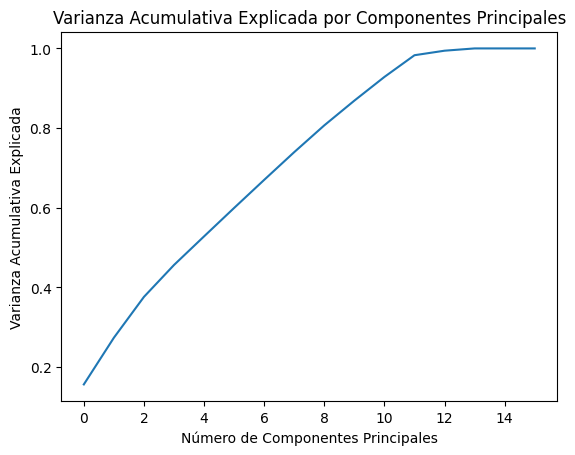

In [ ]:
import matplotlib.pyplot as plt

cumulative_variance = np.cumsum(explained_variance)
plt.plot(cumulative_variance)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulativa Explicada')
plt.title('Varianza Acumulativa Explicada por Componentes Principales')
plt.show()

Al ver el grafico y al sumar los % de varianza para llegar al menos al 90% veo que deberia quedarme con 11 variables

In [ ]:
#exploro las cargas de los 2 primeros componentes

# creo un DataFrame con las cargas de los dos primeros componentes
loadings_df = pd.DataFrame(pca.components_[:2], columns=X.columns)

# transpongo para que las variables sean filas y los componentes sean columnas
loadings_df = loadings_df.T

# nombro las columnas de los componentes
loadings_df.columns = ['Componente 1', 'Componente 2']

# ordenos por magnitud de carga en el Componente 1
loadings_df['Magnitude_Componente_1'] = loadings_df['Componente 1'].abs()
loadings_df = loadings_df.sort_values(by='Magnitude_Componente_1', ascending=False)


print(loadings_df)


                         Componente 1  Componente 2  Magnitude_Componente_1
Densidad_Trafico_Clima   5.356814e-01 -4.014497e-01            5.356814e-01
Velocidad_Promedio       4.713659e-01  4.892360e-01            4.713659e-01
Weatherconditions        3.889126e-01 -3.920929e-01            3.889126e-01
Road_traffic_density     3.876352e-01 -1.373971e-01            3.876352e-01
distancia                3.423637e-01  5.914850e-01            3.423637e-01
multiple_deliveries     -1.332193e-01  1.499571e-01            1.332193e-01
Delivery_person_Ratings  1.209706e-01  1.205639e-02            1.209706e-01
Festival                -1.100780e-01  1.494785e-01            1.100780e-01
Delivery_person_Age     -9.970040e-02 -1.047096e-01            9.970040e-02
Vehicle_condition        9.788413e-02  9.063330e-02            9.788413e-02
City                     6.144444e-02 -5.070256e-02            6.144444e-02
Type_of_vehicle          5.128459e-02  6.075701e-02            5.128459e-02
Order_Month 

## **Componente 1:**

"Delivery_person_Age" tiene una carga negativa muy alta , lo que sugiere una relación inversa fuerte entre la edad del repartidor y este componente.
"distancia" tiene una carga positiva baja, lo que indica que está relacionada positivamente con este componente, pero la magnitud de la relación es menor.
"multiple_deliveries" y "Velocidad_Promedio" tienen relaciones positivas, pero las magnitudes son pequeñas.
"City" y "Delivery_person_Ratings" también tienen relaciones positivas, pero con magnitudes bajas.
Otras variables como "Order_Month", "Road_traffic_density", "Weatherconditions", etc., tienen contribuciones relativamente bajas en este componente.

## **Componente 2:**

"Delivery_person_Age" tiene una carga positiva, aunque la magnitud es pequeña.
"distancia" tiene una carga muy alta y positiva, lo que indica que está fuertemente relacionada con este componente.
"multiple_deliveries" tiene una carga positiva moderada, al igual que "Velocidad_Promedio".
"City" tiene una carga negativa, lo que sugiere una relación inversa.
"Delivery_person_Ratings" y "Order_Month" también tienen contribuciones positivas, pero con magnitudes bajas.
"Road_traffic_density" y "Weatherconditions" tienen cargas positivas, pero sus magnitudes son relativamente bajas.


Aplico nuevamente random forest a ve rsi hubo algun cambio


In [ ]:
#Con 11 que me indico el PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

In [ ]:
#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.06883709754925517


Puedo decir que el modelo mejoro, ahora 7% pero sigue siendo bajo.

# Metodo de ensamble para mejorar el modelo y reducir errores
**XGBoosting**


In [ ]:
#Aplico al modelo un XGboost - Regresión

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#Preprocesamiento creo x e y
X = X = df.drop('Time_taken(min)', axis=1)       # feature matrix todas menos time taken
y = df['Time_taken(min)']          # target feature. Time taken, la que quiero predecir
print(X.shape, y.shape)

(41616, 16) (41616,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

In [ ]:
#Creamos el objeteo XGBoost
regressor = xgb.XGBRegressor(
    n_estimators=80,
    reg_lambda=1, # L1 regularization term on weights
    gamma=0, # Minimum loss reduction required to make a further partition on a leaf node of the tree
    max_depth=3
)

In [ ]:
#Fiteamos
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=80, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#Predecimos
y_pred = regressor.predict(X_test)

In [ ]:
#Error
mean_squared_error(y_test, y_pred)

1.4769390653483954

Cuanto menor sea el valor del error cuadrático medio, mejor será el rendimiento del modelo. Sin embargo, lo que se considera "bueno" o "malo" puede variar según la naturaleza del problema y los datos por lo que hare una validacion cruzada

# CrossValidation

Probare con K fold


In [ ]:
# librerias
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df.shape

(41616, 17)

In [ ]:

#Preprocesamiento creo x e y
X = X = df.drop('Time_taken(min)', axis=1)       # feature matrix todas menos time taken
y = df['Time_taken(min)']          # target feature. Time taken, la que quiero predecir
print(X.shape, y.shape)

(41616, 16) (41616,)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
# crear el modelo
model = RandomForestRegressor(random_state=42, n_estimators=19,max_depth=6)
scores = cross_val_score(model, X, y, cv=7, verbose=1,scoring='r2')

In [ ]:
print("%0.2f de r2 promedio con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))

0.78 de r2 promedio con una desviacion estandar de 0.02


Anteriormente tenia un r2 de 0.48 por lo que puedo ver que mejoro bastante a 0.78.

Por lo que puedo ver que las nuevas variables e incorporaciones implicaron una mejora y me quedo con ellas y con este modelo como final
